[[0.01034164 0.86549585]
 [0.04011317 0.77239875]
 [0.10605636 0.13470859]]


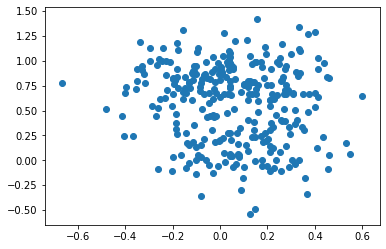

In [2]:
# K-means Clustering code and visualizations by Rodrigo Canaan
# All examples assume 2 dimensions

import numpy as np
import matplotlib.pyplot as plt

# Generates n datapoints in the unit square
def generate_uniform_data(n):
    data = np.random.uniform(low=0,high=1,size=(n,2))
    return data

# Generates n datapoints normally distributed around a ``seed'' point
def generate_gaussian_data(n,seed,var):
    data = np.random.normal(seed,var,(n,2))
    return data

# Example: Generate clouds of points around 3 seeds
seeds = generate_uniform_data(3)
print(seeds)
d1 = generate_gaussian_data(100,seeds[0],0.2)
d2 = generate_gaussian_data(100,seeds[1],0.2)
d3 = generate_gaussian_data(100,seeds[2],0.2)
data = np.concatenate((d1,d2,d3))
x = [d[0] for d in data]
y = [d[1] for d in data]
plt.scatter(x,y)
    

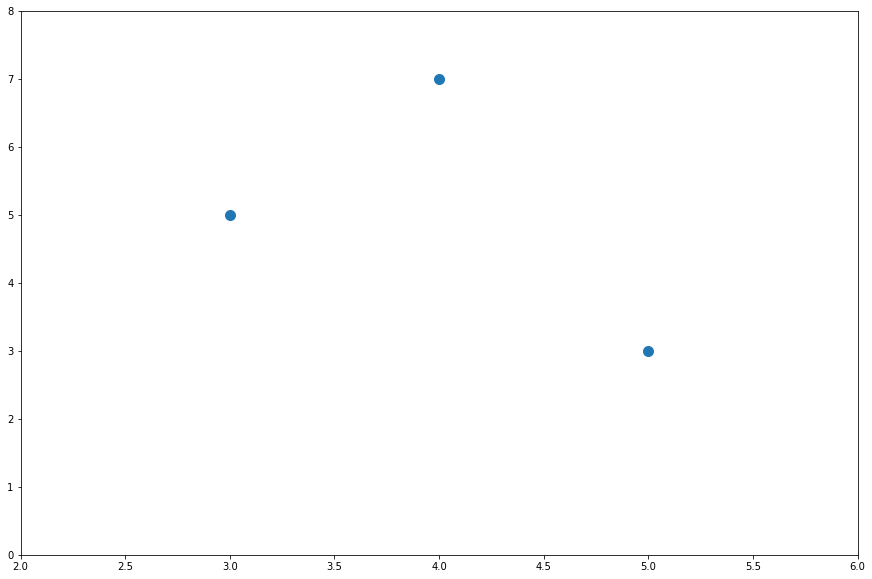

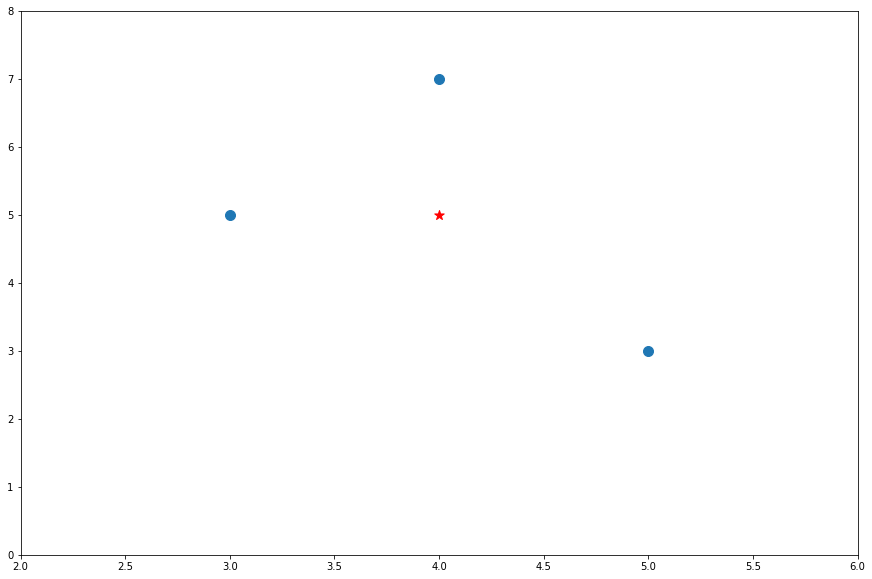

[4.0, 5.0]


In [3]:
# Some supportive methods to visualize the centroids of a data set
def compute_centroid(data):
    x = [d[0] for d in data]
    y = [d[1] for d in data]
    centroid_x = sum(x)/len(x)
    centroid_y = sum(y)/len(y)
    return [centroid_x,centroid_y]

def plot_data_centroid(data):
    x = [d[0] for d in data]
    y = [d[1] for d in data]
    centroid = compute_centroid(data)
    plt.figure(figsize=(15,10))
    plt.xlim([2, 6])
    plt.ylim([0, 8])
    plt.scatter(x,y,s=100)
    plt.show()
    plt.figure(figsize=(15,10))
    plt.xlim([2, 6])
    plt.ylim([0, 8])
    plt.scatter(x,y,s=100)
    plt.scatter(centroid[0],centroid[1],marker="*",s=100,c='red')
    plt.show()
    print(centroid)
    

mock_data = [[5,3],[3,5],[4,7]]
plot_data_centroid(mock_data)

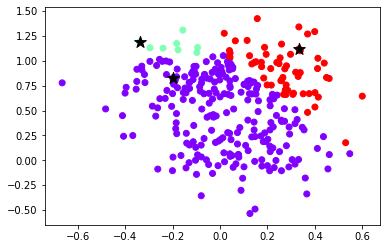

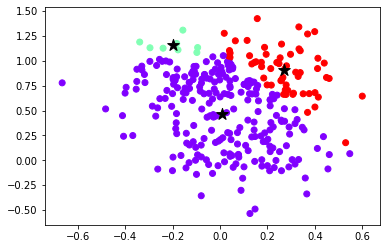

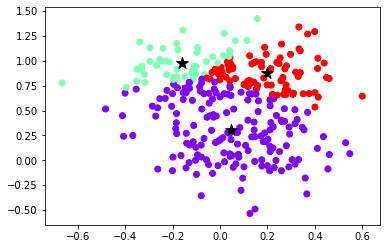

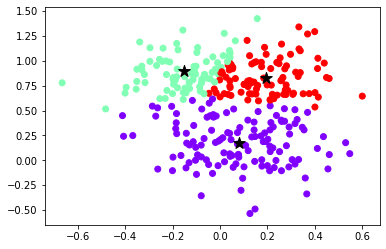

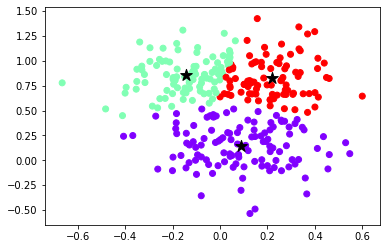

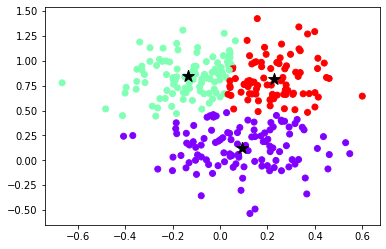

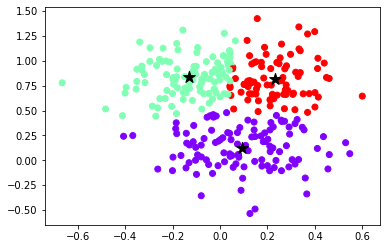

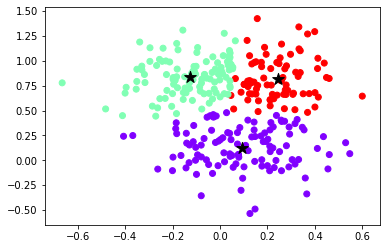

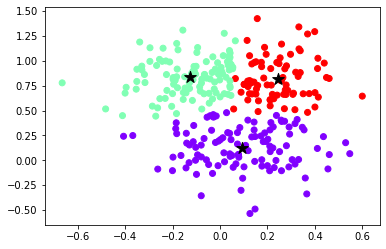

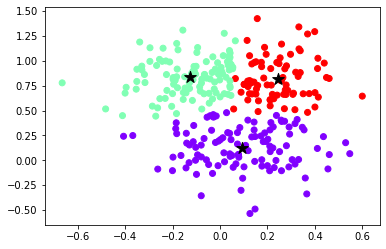

True
9


In [4]:
# Naive implementation of the k-means clustering algorithm with Forgy and Random Partition Initialization
import matplotlib.cm as cm


# Class representing a partition of data points into k mutually-exclusive clusters ("labels")
# Every data point belongs to one and only one 
# This class also implements most methods needed to run the k-means algorithm by re-calculating centroids and re-assigning labels
class partition:
    
    def __init__(self,k,data,labels=None,method="random"):
        self.k = k
        self.x =[d[0] for d in data]
        self.y =[d[1] for d in data]
        self.centroids = None
        self.labels = np.zeros(len(self.x),dtype=int)
        
        # If method is "random", randomly partitions the data, then calculates initial centroid
        if method=="random":
            self.labels = np.asarray([np.random.choice(k) for i in range(len(data))])
            self.calculate_centroids()
        # If method is "Forgy", randomly selects k points as initial centroids, then assigns labels
        elif method=="Forgy":
            centroid_indexes = np.random.choice(range(len(data)),size=(k),replace=False)
            self.centroids = np.asarray([[self.x[idx],self.y[idx]] for idx in centroid_indexes])
            self.reassign_labels()
        # If method is neither "random" nor "Forgy", use the labels provided in the constructor to calculate centroid
        else:
            self.labels=labels
            self.calculate_centroids()
    
    def calculate_centroids(self):
        self.centroids = np.zeros((self.k,2))
        count = np.zeros(self.k)
        # Add the x and y coordinates of every data point to the centroid of its cluster
        for x,y,l in zip(self.x,self.y,self.labels):
            self.centroids[l][0] += x
            self.centroids[l][1] += y
            count[l]+=1
        # Divide by number of points in cluster to get mean
        for l in range(self.k):
            if count[l] > 0:
                self.centroids[l] /= count[l]
            else:
                # In very rare circumstances, a cluster may colapse (have zero elements and thus no centroid)
                # One solution would be to re-assign centroid randomly, but for simiplicity, we raise exception
                raise ValueError("One of the clusters has zero elements!") 
    
    # This both reasigns the label and returns a boolean that indicates whether any changes have been made
    def reassign_labels(self):
        no_change = True
        new_labels = np.zeros(len(self.x),dtype=int)
        idx = 0
        min_dist = float('inf')
        best_label = -1
        for x,y in zip(self.x,self.y):
            min_dist = float('inf')
            best_label = -1
            for l in range(self.k):
                c = self.centroids[l]
                d = np.linalg.norm(c-np.asarray((x,y)))
                if d < min_dist:
                    min_dist=d
                    best_label = int(l)
            new_labels[idx] = int(best_label)
            if no_change and new_labels[idx] != self.labels[idx]:
                no_change = False
            idx+=1
        self.labels = new_labels
        return no_change
    
    # Plots the partition and, if a name is provided, saves the graph to a file
    def plot(self,name=None):
#       Add normal points to the plot
        colors = [pallette[l] for l in self.labels]
        plt.scatter(self.x,self.y,c=colors)
#       Add centroids to the plot
        colors = [pallette[l] for l in range(self.k)]
        x =  [c[0] for c in self.centroids]
        y =  [c[1] for c in self.centroids]
#         print(self.centroids)
#         print(self.labels)
        plt.scatter(x,y,c="black",marker="*",s=150)
        if name:
            plt.savefig(name)
        plt.show()
        
        

# The main method to run k-means clustering, relying on the methods provided by the Partition instance
# At the end, prints False if max epochs were reached, and True if converged successfully, along with the current epoch number
def k_means(k,data,max_epochs=float('inf'),method="Forgy"):
    
    p = partition(k,data,method = method)
    p.plot(method+str(0))
    stop = False
    current_epoch = 0
    while not stop and current_epoch<max_epochs:
        stop = p.reassign_labels()
        if method == "Forgy" and current_epoch == 0:
            stop = False
        p.calculate_centroids()
        p.plot(method+str(current_epoch+1))
        current_epoch+=1
    print(stop)
    print(current_epoch)
        
   
k=3
pallette = cm.rainbow(np.linspace(0, 1, k))
k_means(k,data,10, method = "Forgy")
    
    
    

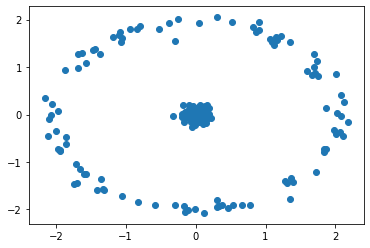

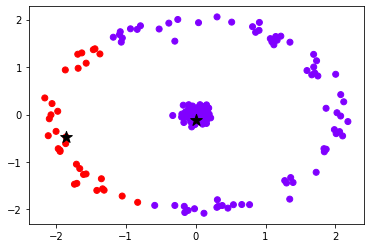

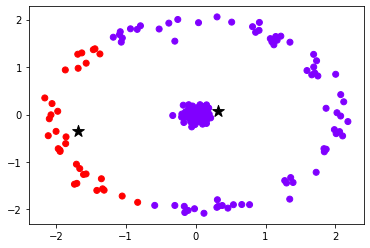

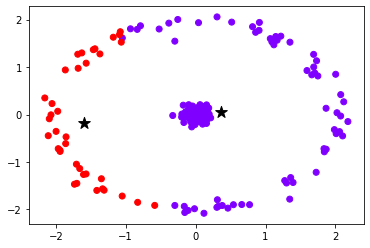

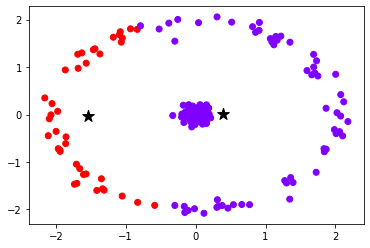

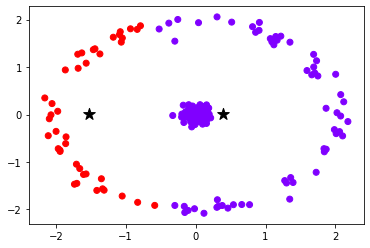

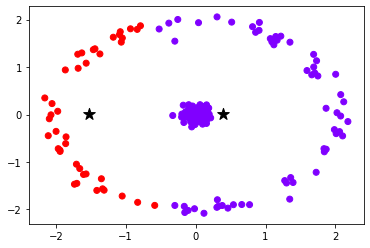

True
5


In [5]:
# An example that shows how k-means can fail if clusters have certain (non-convex) shapes
# Intuitively, with k=2 we'd like to assign a cluster to the outer ring, and another to the center
# However, since the centroid of the ring would be close to the center, this is not possible with a naive implementation
from math import pi, cos, sin

def point(center, radius, var):
    theta = np.random.uniform(low=0,high=2 * pi)
    r = np.random.normal(radius,var)
    return (center[0] + cos(theta) * r, center[1] + sin(theta) * r)

circumference = np.asarray([point((0,0),2,0.1) for _ in range(100)])
center = generate_gaussian_data(100, (0,0),0.1)
non_convex =  np.concatenate((circumference,center))
x = [d[0] for d in non_convex]
y = [d[1] for d in non_convex]
plt.scatter(x,y)
plt.show()

k=2
pallette = cm.rainbow(np.linspace(0, 1, k))
k_means(k,non_convex,10, method = "Forgy")

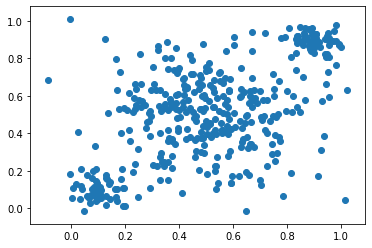

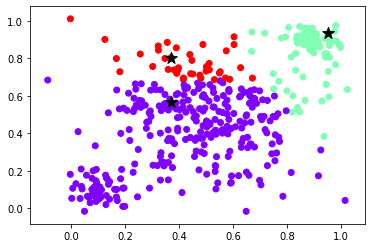

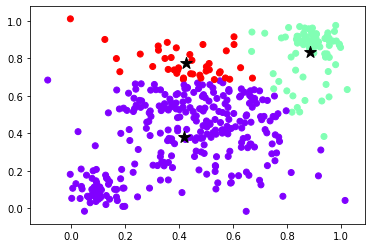

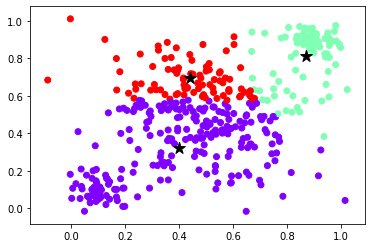

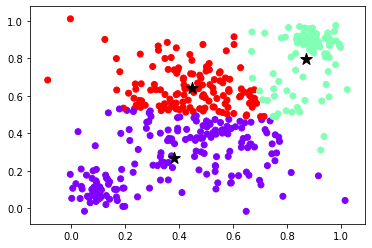

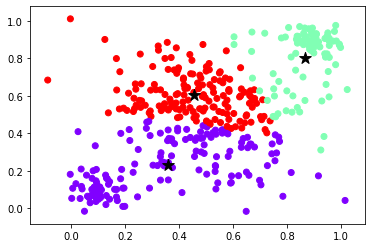

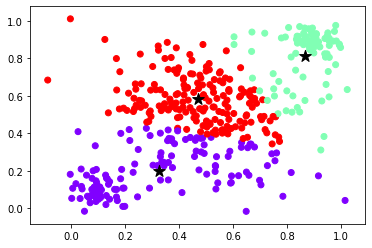

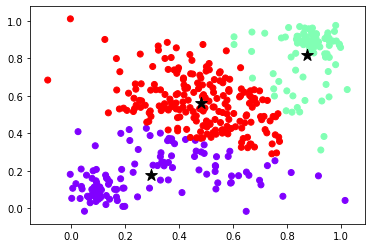

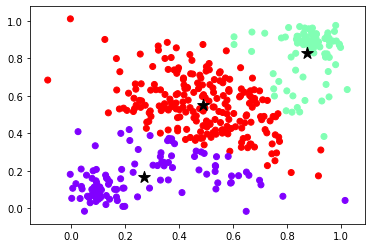

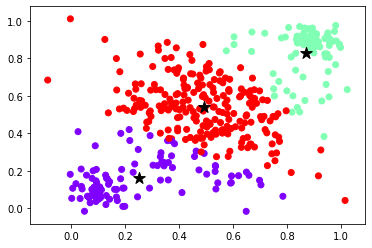

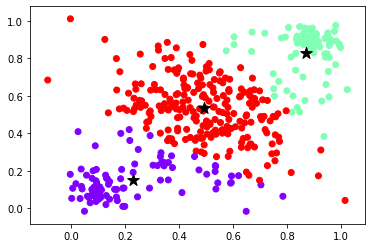

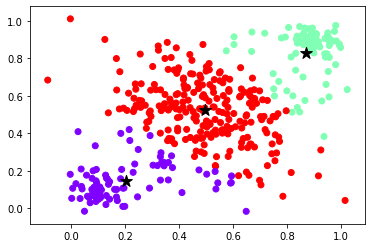

False
10


In [6]:
# An example showing how the algorithm (with a naive implementation) can struggle with clusters of different sizes
# Intuitively, with k=2, we would like:
    # - A centroid in the big middle cluster
    # - A centroid in the bottom left small cluster
    # - A centroid in the top right small cluster
# However, the algorithm implicitly assumes clusters have similar sizes
# For this reason, the corner clusters "eat into" the middle one and their centroids are displaced

d1 = generate_gaussian_data(50,(0.1,0.1),0.05)
d2 = generate_gaussian_data(300,(0.5,0.5),0.2)
d3 = generate_gaussian_data(50,(0.9,0.9),0.05)

unbalanced_data = np.concatenate((d1,d2,d3))
x = [d[0] for d in unbalanced_data]
y = [d[1] for d in unbalanced_data]
plt.scatter(x,y)
plt.show()

k=3
pallette = cm.rainbow(np.linspace(0, 1, k))
k_means(k,unbalanced_data,10, method = "Forgy")